In [1]:
import numpy as np
from scipy import stats
rng = np.random.default_rng()
dist = stats.nbinom
shapes = (5, 0.5)
data = dist.rvs(*shapes, size=1000, random_state=rng)

In [2]:
bounds = [(0, 30), (0, 1)]
res = stats.fit(dist, data, bounds)

In [3]:
res.params

FitParams(n=5.0, p=0.5039362020760304, loc=0.0)

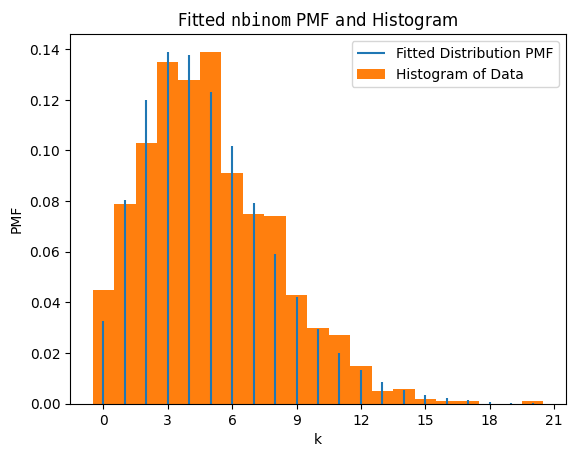

In [4]:
import matplotlib.pyplot as plt  # matplotlib must be installed to plot
res.plot()
plt.show()

In [5]:
bounds = {'n': (0, 30)}  # omit parameter p using a `dict`
res2 = stats.fit(dist, data, bounds)
res2.params

FitParams(n=5.0, p=0.5043854870370418, loc=0.0)

In [6]:
bounds = {'n': (6, 6)}  # fix parameter `n`
res3 = stats.fit(dist, data, bounds)
res3.params
res3.nllf() > res.nllf()

True

In [7]:
from scipy.optimize import differential_evolution
rng = np.random.default_rng()
def optimizer(fun, bounds, *, integrality):
    return differential_evolution(fun, bounds, strategy='best2bin',
                                  rng=rng, integrality=integrality)
bounds = [(0, 30), (0, 1)]
res4 = stats.fit(dist, data, bounds, optimizer=optimizer)
res4.params

FitParams(n=5.0, p=0.5040293980794491, loc=0.0)